## Introduction

#### A bird strike is strictly defined as a collision between a bird and an aircraft which is in flight or on a take-off or landing roll. The term is often expanded to cover other wildlife strikes - with bats or ground animals. Bird Strike is common and can be a significant threat to aircraft safety. For smaller aircraft, significant damage may be caused to the aircraft structure and all aircraft, especially jet-engine ones, are vulnerable to the loss of thrust which can follow the ingestion of birds into engine air intakes. This has resulted in several fatal accidents. Bird strikes may occur during any phase of flight, but are most likely during the take-off, initial climb, approach and landing phases due to the greater numbers of birds in flight at lower levels. To have a closer look the following document visually depicts the data collected on Bird Strikes by FAA between 2000-2011.

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
!pip install tidyverse
!pip install patchwork
!pip install tidytext
!pip install lattice
!pip install maps
!pip install mapdata

In [3]:
import tidyverse
import patchwork
import tidytext
import lattice 
import maps
import mapdata

In [4]:
Bird=pd.read_excel('C:/Users/payal/Desktop/Payal/Internkaksha Project/Data Visualisation Bird Strikes/Bird Strikes data.xlsx')

In [5]:
Bird.head(3)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No


In [6]:
Bird.shape

(25558, 26)

In [7]:
Bird.describe()

,Record ID,Wildlife: Number Struck Actual,Cost: Total $,Feet above ground,Number of people injured
count,25558.000000,25558.000000,2.555800e+04,25429.000000,25558.000000
mean,253916.085609,2.691525,5.567354e+03,799.028432,0.001056
std,38510.453382,12.793975,1.219713e+05,1740.079843,0.050420
min,1195.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,225783.750000,1.000000,0.000000e+00,0.000000,0.000000
50%,248749.000000,1.000000,0.000000e+00,50.000000,0.000000
75%,269168.750000,1.000000,0.000000e+00,700.000000,0.000000
max,321909.000000,942.000000,1.239775e+07,18000.000000,6.000000


In [8]:
Bird.isnull().sum()

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [9]:
Bird['Remarks'].unique()

array(['FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN TYPE. #1 ENG WAS SHUT DOWN AND DIVERTED TO EWR. SLIGHT VIBRATION. A/C WAS OUT OF SVC FOR REPAIRS TO COWLING, FAN DUCT ACCOUSTIC PANEL. INGESTION. DENTED FAN BLADE #26 IN #1 ENG. HEAVY BLOOD STAINS ON L WINGTIP',
       '102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR WAS DAMAGED AND REPLACED.',
       'FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER APCH END OF RWY. NO DMG. JUST A LOT OF BIRD DROPPINGS ON WINDSCREEN.',
       ...,
       'STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD AS BROWN/WHITE. TWY.',
       'PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L BTWN TWY F & J. NO REMAINS FOUND ON RWY OR ON A/C. NO DMG TO A/C.',
       'HIT CENTER OF RADOME, CAVING IN ABOUT 12". RADOME WAS REPLACED. CARCASS FOUND IN SAFETY ARA ON RT SIDE OF RWY 22 AT INTXN OF RWY 18/36.'],
      dtype=object)

In [10]:
Bird['Origin State'].unique()

array(['New York', 'Texas', 'Louisiana', 'Washington', 'Virginia', nan,
       'Delaware', 'DC', 'Georgia', 'Florida', 'California', 'Illinois',
       'Connecticut', 'Missouri', 'Rhode Island', 'Hawaii', 'Arizona',
       'Tennessee', 'South Carolina', 'South Dakota', 'New Jersey',
       'Colorado', 'Minnesota', 'Alabama', 'Ohio', 'Wisconsin',
       'Michigan', 'Massachusetts', 'Alaska', 'North Carolina',
       'Kentucky', 'Indiana', 'Oregon', 'Pennsylvania', 'New Hampshire',
       'Arkansas', 'Nevada', 'Mississippi', 'Maryland', 'Maine', 'Quebec',
       'Idaho', 'British Columbia', 'Utah', 'Nebraska', 'Iowa',
       'New Mexico', 'West Virginia', 'Oklahoma', 'North Dakota',
       'Vermont', 'Wyoming', 'Kansas', 'Prince Edward Island', 'Montana',
       'Puerto Rico', 'Ontario', 'Virgin Islands',
       'Newfoundland and Labrador', 'Alberta', 'Saskatchewan'],
      dtype=object)

In [11]:
Bird['When: Phase of flight'].unique()

array(['Climb', 'Landing Roll', 'Approach', 'Take-off run', 'Descent',
       nan, 'Taxi', 'Parked'], dtype=object)

In [12]:
Bird['Aircraft: Type'].unique()

array(['Airplane', nan], dtype=object)

In [13]:
Bird.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [14]:
Bird.size

664508

In [15]:
Bird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 25429 non-null  object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [16]:
Bird.dropna(inplace=True)

In [17]:
Bird.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [18]:
Bird.shape

(20142, 26)

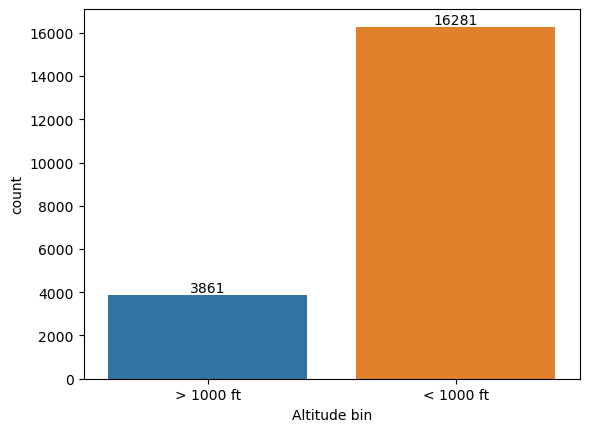

In [19]:
Altitude=sns.countplot(x='Altitude bin',data=Bird)
for a in Altitude.containers:
    Altitude.bar_label(a)

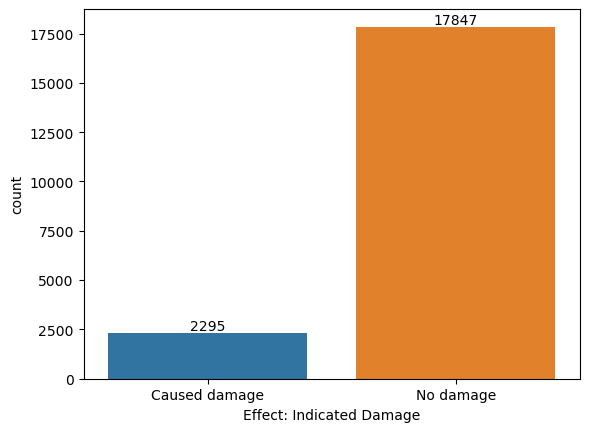

In [20]:
Damage=sns.countplot(x='Effect: Indicated Damage',data=Bird)
for a in Damage.containers:
    Damage.bar_label(a)

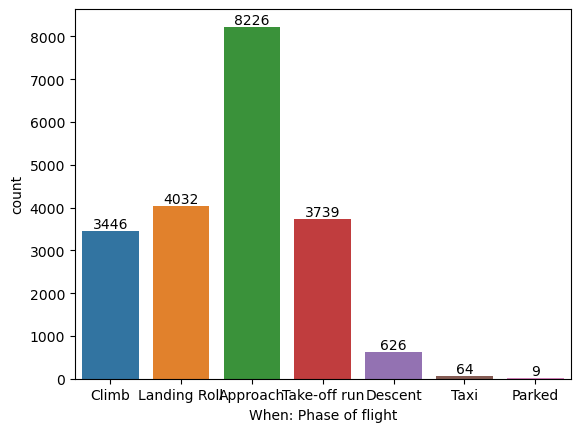

In [21]:
Flight_phase=sns.countplot(x='When: Phase of flight',data=Bird)
for a in Flight_phase.containers:
    Flight_phase.bar_label(a)

In [22]:
data= Bird['When: Phase of flight'].value_counts()
data.index

Index(['Approach', 'Landing Roll', 'Take-off run', 'Climb', 'Descent', 'Taxi',
       'Parked'],
      dtype='object')

In [23]:
data.values

array([8226, 4032, 3739, 3446,  626,   64,    9], dtype=int64)

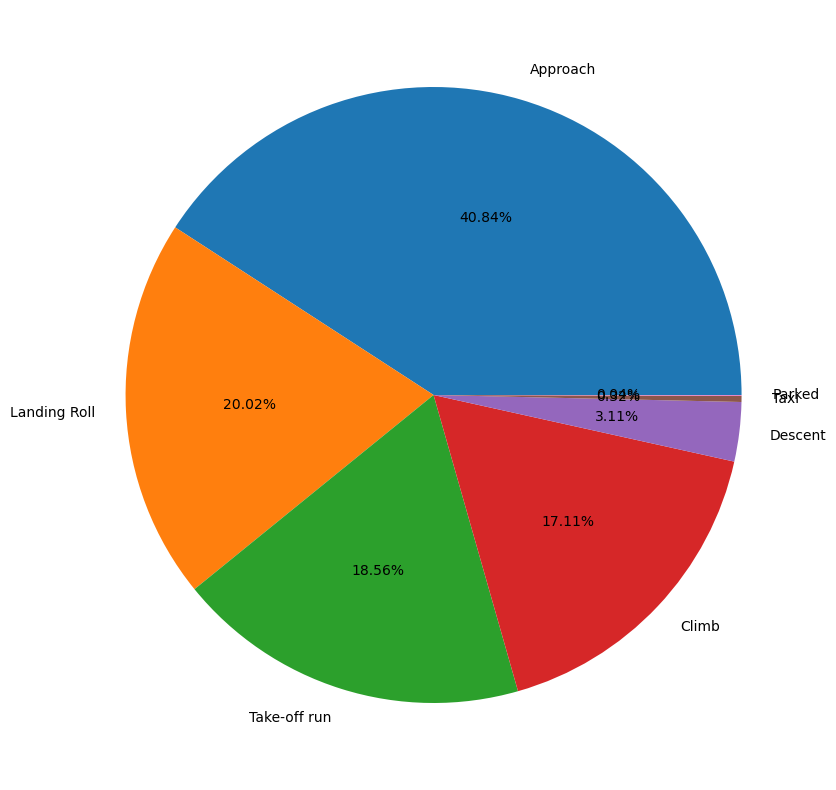

In [24]:
plt.figure(figsize=(10,10))
plt.pie(data.values, labels= data.index,autopct="%0.2f%%")
plt.show()

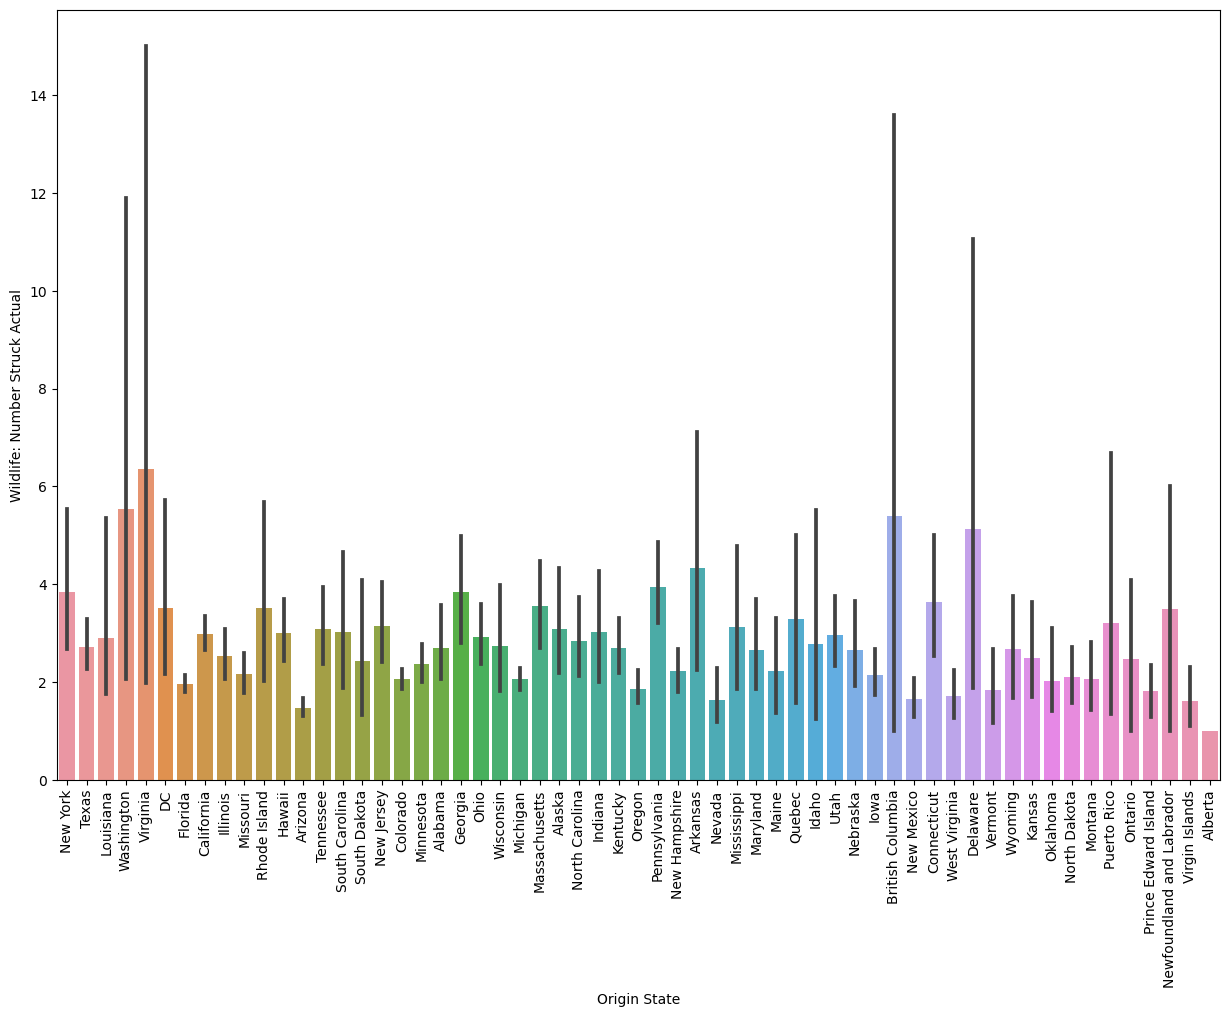

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(data=Bird,x="Origin State",y="Wildlife: Number Struck Actual")
plt.xticks(rotation=90)
plt.show()

C:\Users\payal\AppData\Local\Temp\ipykernel_24680\2625734219.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Bird.corr(),cmap='plasma',annot=True)


<Axes: >

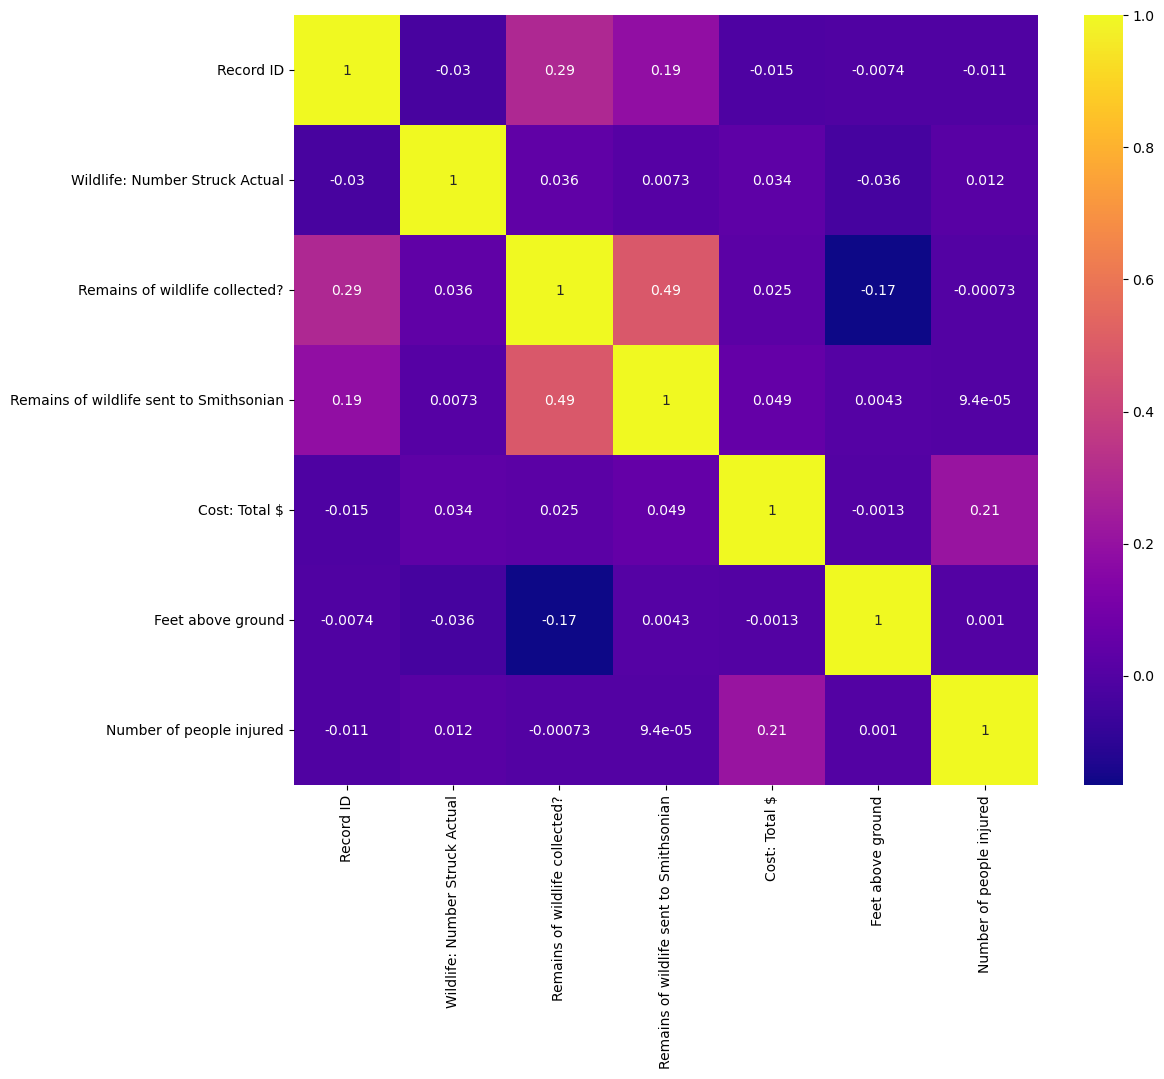

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(Bird.corr(),cmap='plasma',annot=True)

<Axes: xlabel='Feet above ground'>

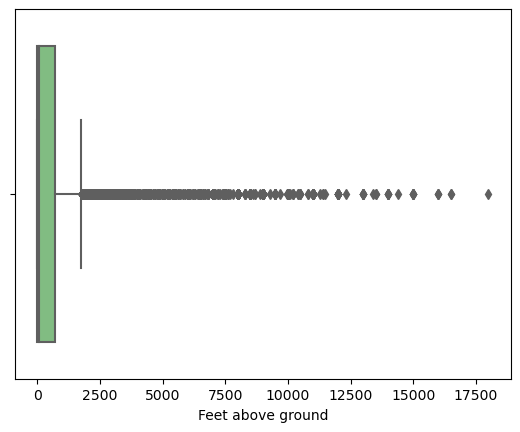

In [27]:
#boxplot on mean of feet above ground
sns.boxplot(x=Bird['Feet above ground'],palette='YlGn')

<Axes: xlabel='When: Phase of flight', ylabel='count'>

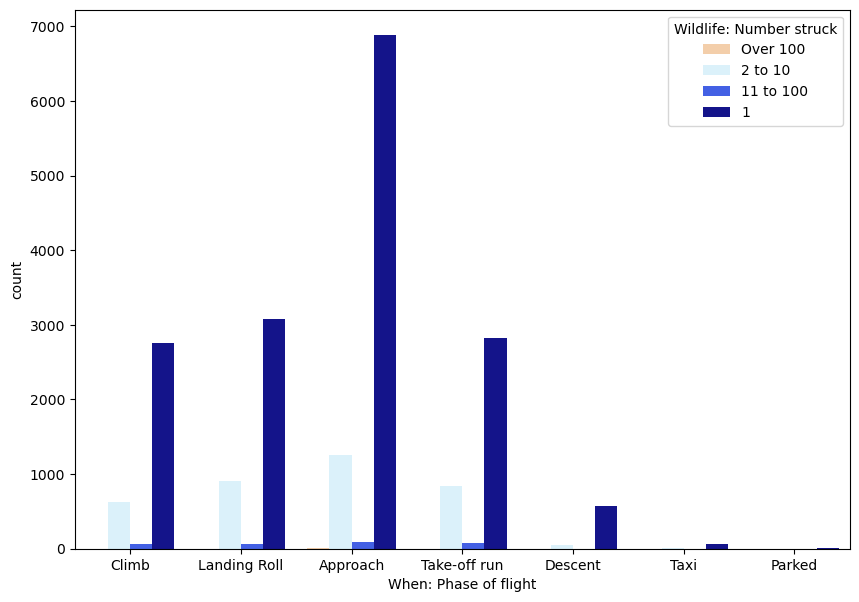

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x='When: Phase of flight',hue ='Wildlife: Number struck',data=Bird, palette='flag')

<Axes: xlabel='When: Phase of flight', ylabel='count'>

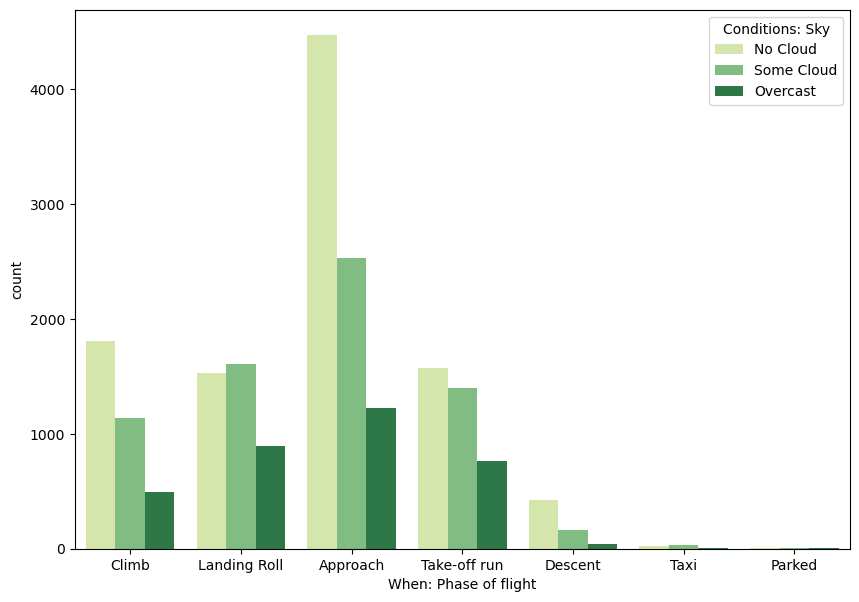

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='When: Phase of flight',hue ='Conditions: Sky',data=Bird, palette='YlGn')

<Axes: xlabel='Effect: Impact to flight', ylabel='Feet above ground'>

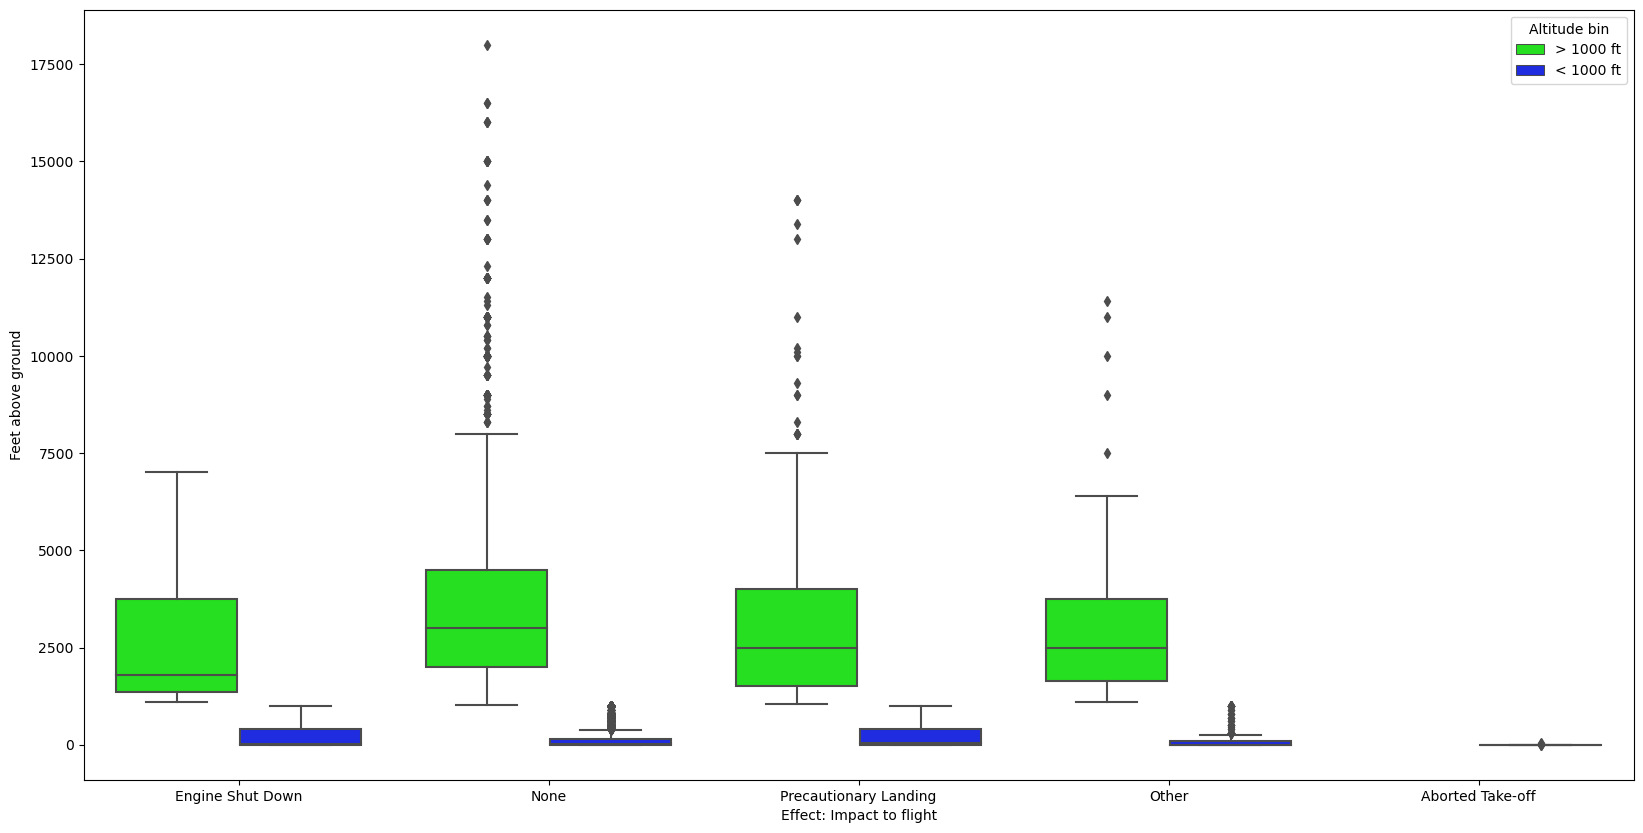

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Effect: Impact to flight', y='Feet above ground', hue ='Altitude bin',data=Bird, palette='hsv')

### Add year column

In [31]:
Bird['Year']=pd.DatetimeIndex(Bird.FlightDate).year

In [32]:
Bird.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?,Year
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes,2000
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No,2001
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No,2001
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes,2002
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No,2003


<Axes: xlabel='Year', ylabel='count'>

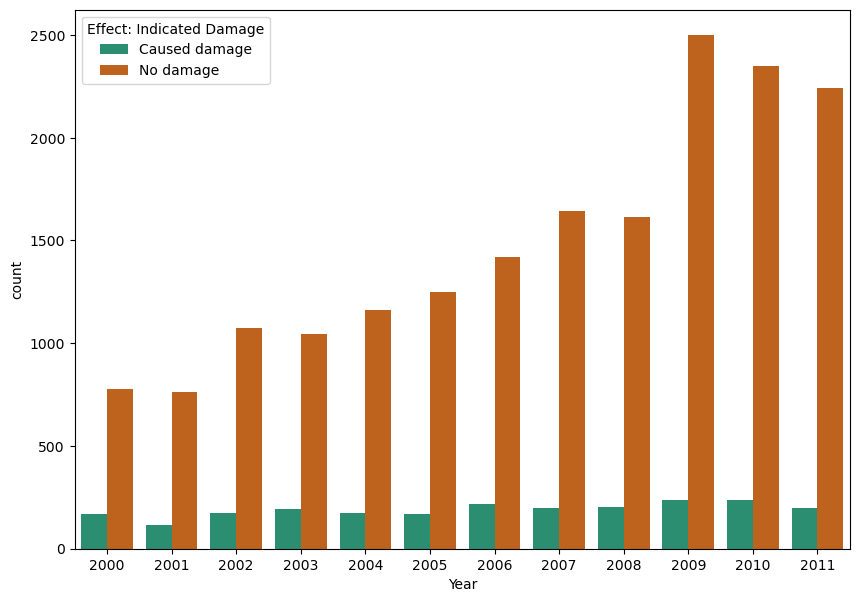

In [33]:
plt.figure(figsize=(10,7))
sns.countplot(x ='Year',hue='Effect: Indicated Damage',data=Bird, palette='Dark2')